[-3.14402042e+03+0.j  3.26528723e-11+0.j -1.94377206e+01+0.j
  2.46282337e+01+0.j -1.84209328e+01+0.j -3.76991118e+00+0.j
  1.61386260e-15+0.j             inf+0.j -5.41491689e+02+0.j
 -1.44034996e+03+0.j  5.34199287e-15+0.j -3.16256615e+00+0.j]


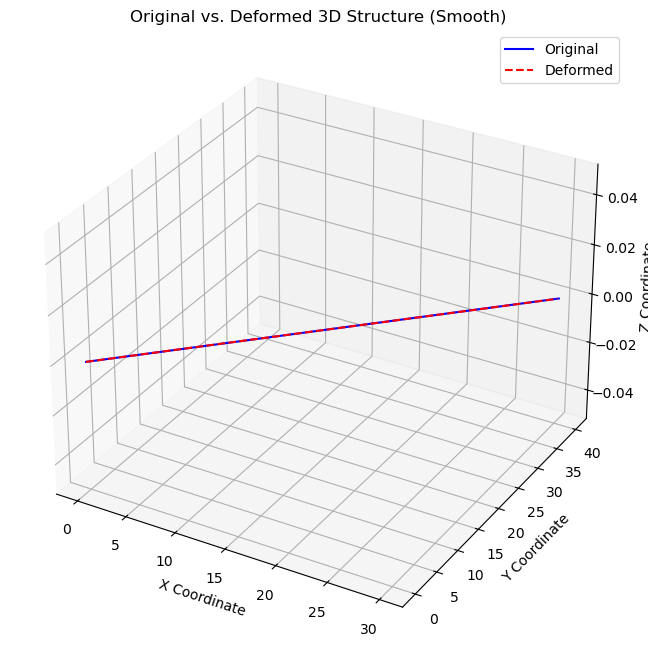

Displacements:
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.54929659e-03 -1.27323954e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.66816243e-17]
Forces:
 [ 6.00000000e-01  8.00000000e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.47104551e-15 -6.00000000e-01 -8.00000000e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.46944695e-18]


In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('..'))
from src.mat_struct import *
from src.nonlinear_analysis import *

node0 = [0, 0, 0]  # Fixed
node1 = [30, 40, 0]  # Midpoint (force applied)
nodes = np.array([node0, node1])

el_1 = [0, 1, 1000, 0.3, np.pi, np.pi/4, np.pi/4, np.pi/2, np.pi/2, None]
element_connect = np.array([el_1], dtype=object)

f_appl = np.array([[0,0,0,0,0,0],   # Node 0: No force
                   [-3/5,-4/5,0,0,0,0]])

support_0 = [0, 1, 1, 1, 1, 1, 1]  # Fixed: Restraints all DOF
support_1 = [1, 0, 0, 0, 0, 0, 0]  # Free: No restraints
supports = np.array([support_0, support_1])

del_vec, F_vec, nodevals, elementvals = nonlinear_analysis(nodes, element_connect, f_appl, supports)

print("Displacements:\n", del_vec)
print("Forces:\n", F_vec)